# Importing relevant libraries for Logistic Regression

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the train and test datasets

In [3]:
featuretrain_X = pd.read_csv('features_train.csv')
featuretest_X = pd.read_csv('features_test.csv')
targettrain_y = pd.read_csv('target_train.csv')
targettest_y = pd.read_csv('target_test.csv')

In [4]:
featuretrain_X.head(5)

,notimpt,Medu,Fedu,traveltime,studytime,failures,famrel,goout,Dalc,Walc,...,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,1,1,1,2,0,4,2,1,2,...,1,0,1,0,0,1,0,1,1,0
1,1,3,3,1,2,0,4,3,1,2,...,1,0,0,1,0,1,0,1,0,1
2,1,4,2,1,3,0,5,3,1,3,...,1,0,0,1,0,1,0,1,1,0
3,1,3,3,3,2,0,5,3,1,3,...,0,1,1,0,0,1,0,1,1,0
4,1,1,1,1,3,0,4,4,1,1,...,1,0,0,1,0,1,1,0,0,1


In [5]:
featuretest_X.head(5)

,notimpt,Medu,Fedu,traveltime,studytime,failures,famrel,goout,Dalc,Walc,...,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,3,1,1,1,3,5,5,5,5,...,1,0,1,0,1,0,0,1,0,1
1,1,3,3,2,2,0,4,2,1,3,...,1,0,1,0,0,1,0,1,0,1
2,1,2,2,1,1,0,4,5,2,4,...,1,0,0,1,0,1,0,1,0,1
3,1,3,3,2,4,1,5,5,3,4,...,1,0,0,1,0,1,1,0,1,0
4,1,2,1,1,2,0,4,5,1,1,...,1,0,1,0,0,1,1,0,0,1


In [6]:
targettrain_y.head(5)

,grade
0,Average
1,Average
2,High
3,Average
4,Average


In [7]:
targettest_y.head(5)

,grade
0,Average
1,Average
2,Average
3,Average
4,Average


### Logistic Regression

In [8]:
# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(featuretrain_X, targettrain_y)

# Predictions
logistic_predictions = logistic_model.predict(featuretest_X)

# Evaluation
logistic_accuracy = accuracy_score(targettest_y, logistic_predictions)
logistic_report = classification_report(targettest_y, logistic_predictions)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Classification Report:\n", logistic_report)

Logistic Regression Accuracy: 0.8038277511961722
Classification Report:
               precision    recall  f1-score   support

     Average       0.84      0.93      0.88       165
        High       0.65      0.39      0.49        33
         Low       0.20      0.09      0.13        11

    accuracy                           0.80       209
   macro avg       0.56      0.47      0.50       209
weighted avg       0.77      0.80      0.78       209



C:\Users\limwe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**For the ‘Average’ class, the model has a precision of 0.84, recall of 0.93, and F1-score of 0.88. This means that the model is performing well on the ‘Average’ class but not as well on the ‘High’ and ‘Low’ classes based on the F1-score. This might be because the average classes data is much more compared to that of the 'High' and 'Low' classes.**

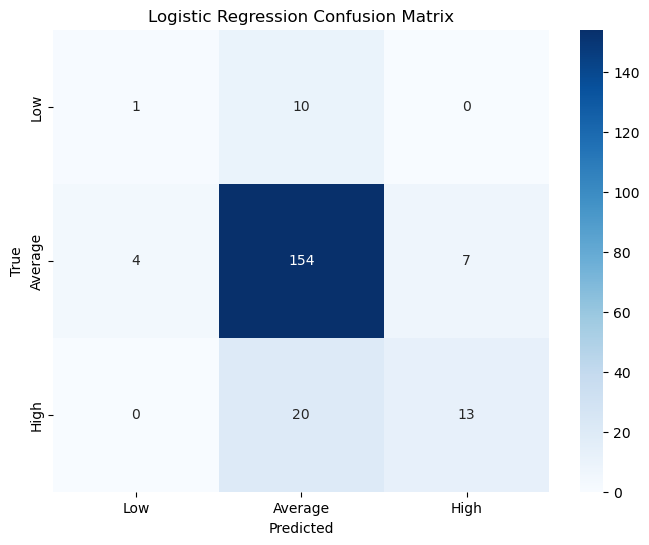

In [99]:
# Define class labels
class_labels = ['Low', 'Average', 'High']

# Generate confusion matrix
logistic_conf_matrix = confusion_matrix(targettest_y, logistic_predictions, labels=class_labels)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

**As expected, the model was able to do well in predicting the 'Average' class results, but not so much for the 'High' and 'Low' classes.**

## Visualising the findings

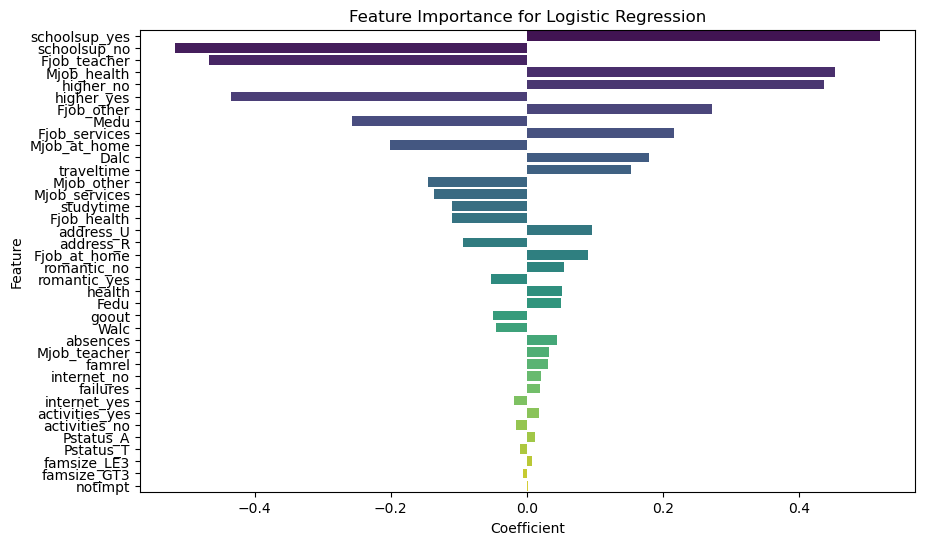

In [100]:
from sklearn.metrics import roc_curve, auc

# Coefficient analysis for feature importance
coefs = pd.DataFrame({
    'Feature': featuretrain_X.columns,
    'Coefficient': logistic_model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coefs, x='Coefficient', y='Feature', palette='viridis')
plt.title('Feature Importance for Logistic Regression')
plt.show()

In [103]:
feature_names = featuretrain_X.columns
coefficients = logistic_model.coef_[0]

# Creating a DataFrame to store feature names and their coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sorting the DataFrame by absolute coefficient values to see the most important features
feature_importance['Absolute Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Displaying the top N most important features
print(feature_importance.head(10))

          Feature  Coefficient  Absolute Coefficient
29  schoolsup_yes     0.518839              0.518839
28   schoolsup_no    -0.516561              0.516561
27   Fjob_teacher    -0.467143              0.467143
19    Mjob_health     0.452874              0.452874
32      higher_no     0.437485              0.437485
33     higher_yes    -0.435207              0.435207
25     Fjob_other     0.272281              0.272281
1            Medu    -0.256674              0.256674
26  Fjob_services     0.216407              0.216407
18   Mjob_at_home    -0.201366              0.201366


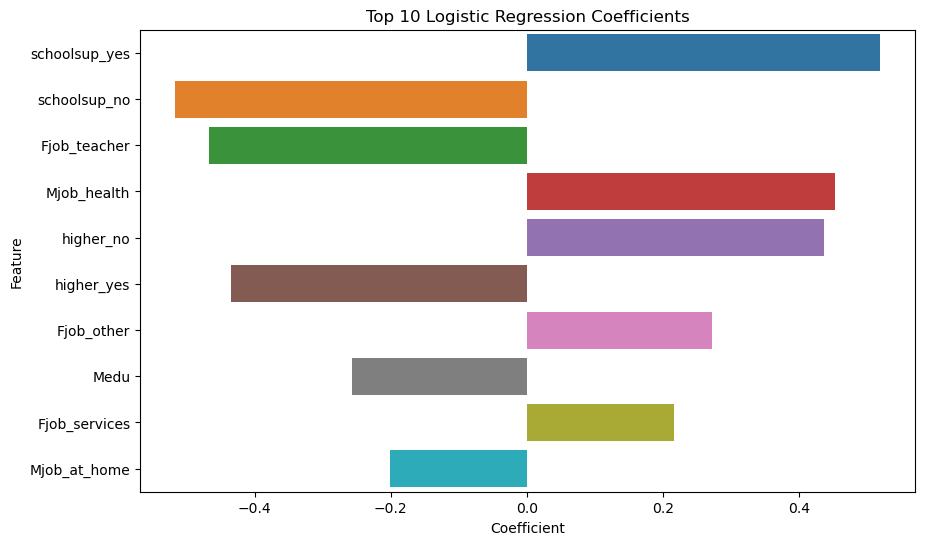

Positive coefficients increase the likelihood of higher student results, while negative coefficients decrease it.


In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression Coefficients
logistic_coeffs = pd.DataFrame({'Feature': featuretrain_X.columns, 'Coefficient': logistic_model.coef_[0]})
logistic_coeffs.sort_values('Coefficient', inplace=True, key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=logistic_coeffs.head(10))
plt.title('Top 10 Logistic Regression Coefficients')
plt.show()

# Explanation
print("Positive coefficients increase the likelihood of higher student results, while negative coefficients decrease it.")

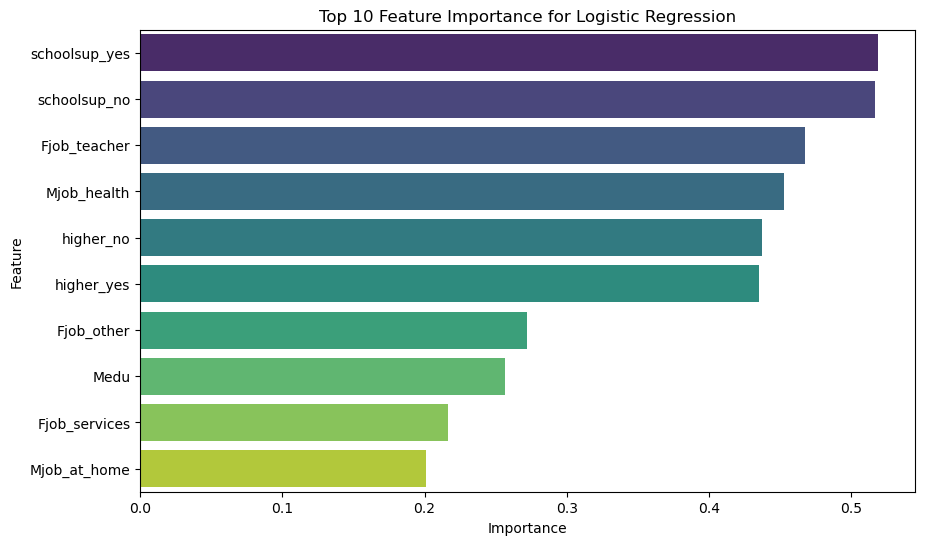

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Logistic Regression Feature Importance (using coefficients)
logistic_coeffs = pd.DataFrame({'Feature': featuretrain_X.columns, 'Importance': logistic_model.coef_[0]})
logistic_coeffs['Importance'] = logistic_coeffs['Importance'].abs()  # Take absolute value
logistic_coeffs.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=logistic_coeffs.head(10), palette='viridis')
plt.title('Top 10 Feature Importance for Logistic Regression')
plt.show()

**As seen from the above bar graph, we can see that whether a student gets additional support from the school can contribute to their grades. It can include remedial or consultation sessions. The jobs of their parents also add to it as well.**